In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import math


Точка:  0.3333333333333333
    Значение ф-ии:  1.3956124250860895
    Значение ломаной:  1.405590701358537
    Разница:  0.009978276272447406

Точка:  0.5
    Значение ф-ии:  1.6487212707001282
    Значение ломаной:  1.6487212707001282
    Разница:  0.0

Точка:  0.6666666666666666
    Значение ф-ии:  1.9477340410546757
    Значение ломаной:  1.9609071013084924
    Разница:  0.013173060253816704

Точка:  0.8333333333333334
    Значение ф-ии:  2.300975890892825
    Значение ломаной:  2.317427287228132
    Разница:  0.01645139633530679

Точка:  1.0
    Значение ф-ии:  2.718281828459045
    Значение ломаной:  2.718281828459045
    Разница:  0.0



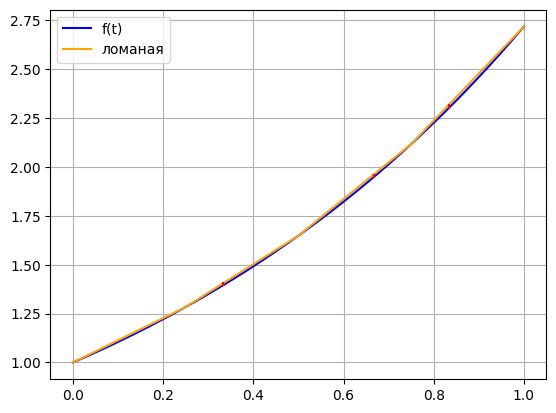

In [18]:
# Ispolzuya lineinuy intrpolaziu naidite znahenia funkcii d tochkah ..... 

def f(x):
    return np.e**x # your function goes here

def LinearInterpolation(f, t):
    x = np.linspace(0, 1, 1000)
    plt.plot(x, f(x), color = 'blue', label = 'f(t)')
    
    # fx = []
    # for i in range(len(t2)):
    #     fx.append(f(t2[i]))
    # plt.plot(t2, fx, color = 'orange', label = 'ломаная')

    x2 = np.linspace(0, 1, 5)
    plt.plot(x2, f(x2), color = 'orange', label = 'ломаная')
    
    fxList = []
    flList = []
    for i in range(len(t) - 1):
        for j in range(len(t)):
            if x2[i] < t[j] <= x2[i+1]:
                plt.plot([t[j], t[j]], 
                         [f(t[j]), f(x2[i]) + (t[j] - x2[i]) * ((f(x2[i+1]) - f(x2[i]))/(x2[i+1] - x2[i]))], 
                         color = 'red')
                print("Точка: ", t[j])
                fx = f(t[j])
                fxList.append(fx)
                print("    Значение ф-ии: ", fx)
                fl = f(x2[i]) + (t[j] - x2[i]) * ((f(x2[i+1]) - f(x2[i]))/(x2[i+1] - x2[i]))
                flList.append(fl)
                print("    Значение ломаной: ", fl)
                print("    Разница: ", np.abs(fx - fl))
                print("")
    
    plt.legend()
    plt.grid()
    plt.show()
    return flList, fxList

t = []
for i in range(5):
    t.append((i+2)/6)
flList, fxList = LinearInterpolation(f, t)

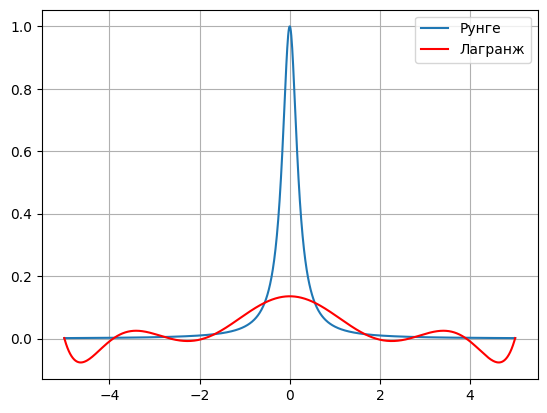

Значение Рунге при x=4: 0.0024937655860349127
Значение Лагранжа при x=4: -0.009193540822272523
разница: 0.011687306408307434

Значение Рунге при x=5: 0.001597444089456869
Значение Лагранжа при x=5: 0.001597444089456869
разница: 0.0


In [3]:
# zadaite funksiu runge f(x) = 1 / (1 + 25x^2) .......

def f(x):
    return 1 / (1 + 25 * x**2)

def lagrange(val, x, y):
    lagr = 0
    for i in range(len(x)):
        temp = y[i]
        for k in range(len(x)):
            if (i != k): temp *= (val - x[k]) / (x[i] - x[k])
        lagr += temp
    return lagr

x = np.linspace(-5, 5, 10)
y = [f(i) for i in x]
z = np.linspace(-5, 5, 1000)
plt.plot(z, f(z), label='Рунге')
plt.plot(z, lagrange(z, x, y), color='red', label='Лагранж')

plt.grid() # 10 interpolation nodes
plt.legend()
plt.show()

print('Значение Рунге при x=4:', f(4))
print('Значение Лагранжа при x=4:', lagrange(4, x, y))
print('разница:', np.abs(f(4) - lagrange(4, x, y)))
print()
print('Значение Рунге при x=5:', f(5))
print('Значение Лагранжа при x=5:', lagrange(5, x, y))
print('разница:', np.abs(f(5) - lagrange(5, x, y)))

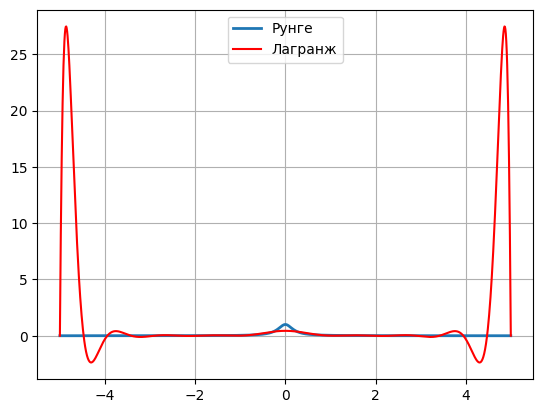

In [4]:
x = np.linspace(-5, 5, 20)
y = [f(i) for i in x]
z = np.linspace(-5, 5, 1000)
t = np.linspace(-5, 5, 1000)
plt.plot(z, f(z), label='Рунге', linewidth=2)
plt.plot(t, lagrange(t, x, y), label='Лагранж', color='red')

plt.legend() # 20 interpolation nodes 
plt.grid()
plt.show()

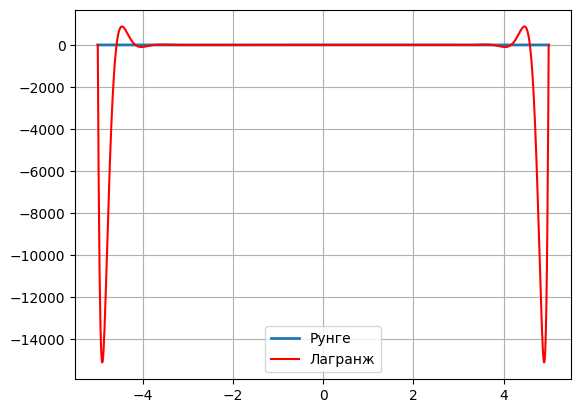

In [5]:
x = np.linspace(-5, 5, 25)
y = [f(i) for i in x]
z = np.linspace(-5, 5, 1000)
t = np.linspace(-5, 5, 1000)
plt.plot(z, f(z), label='Рунге', linewidth=2)
plt.plot(t, lagrange(t, x, y), label='Лагранж', color='red')

plt.legend() # 25 interpolation nodes
plt.grid()
plt.show()

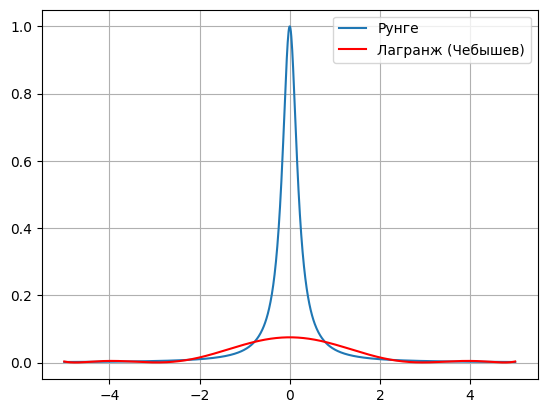

In [6]:
# chebyshev nodes for runge function

def f(x):
    return 1 / (1 + 25 * x**2)

def T(a, b, n):
    vals = np.arange(1, n + 1)
    return 1 / 2 * (a + b) + 1 / 2 * (b - a) * np.cos(np.pi / (2 * n) * (2 * vals - 1))

interpolation_steps = 10
x = T(-5, 5, interpolation_steps)
y = [f(i) for i in x]

z = np.linspace(-5, 5, 1000) # 10 nodes
plt.plot(z, f(z), label='Рунге')
t = np.linspace(-5, 5, 1000)
plt.plot(t, lagrange(t, x, y), color='red', label='Лагранж (Чебышев)')

plt.grid()
plt.legend()
plt.show()

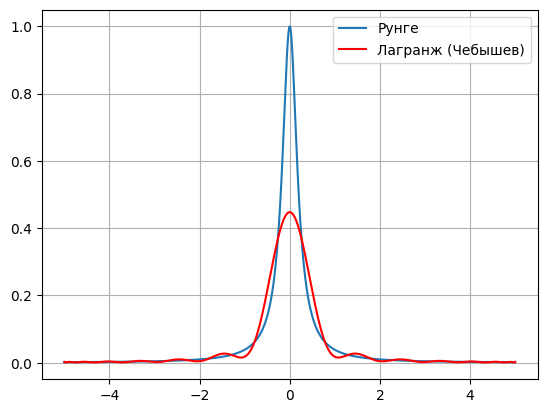

In [7]:
interpolation_steps = 30
x = T(-5, 5, interpolation_steps)
y = [f(i) for i in x]

z = np.linspace(-5, 5, 1000) # 30 nodes
plt.plot(z, f(z), label='Рунге')
t = np.linspace(-5, 5, 1000)
plt.plot(t, lagrange(t, x, y), color='red', label='Лагранж (Чебышев)')

plt.grid()
plt.legend()
plt.show()